In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageChops
import math, operator

In [2]:
# Load the image and reference image
img = cv2.imread("./images/img1.jpg")
ref_img = cv2.imread("./images/reference.jpg")

In [3]:
def hist_match(source, template):

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [4]:
img3 = hist_match(img,ref_img)

In [5]:
# Typecasting to int
img4 = [[np.round(i) for i in k] for k in img3]

In [6]:
img4 = np.clip(img4, 0, 255)
img4 = np.array(img4, dtype=np.uint8)

In [7]:
cv2.imshow('img',img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
def rmse(image1, image2):
    # Ensure that the images have the same shape
    assert image1.shape == image2.shape, "Images must have the same shape"
    # Calculate the mean squared error between the images
    mse = np.mean((image1 - image2) ** 2)
    # Take the square root of the mean squared error to get the root mean squared error
    rmse = np.sqrt(mse)
    return rmse

In [9]:
# rmse(matched_img,img4)

Text(0.5, 1.0, 'Histogram matching(part b)')

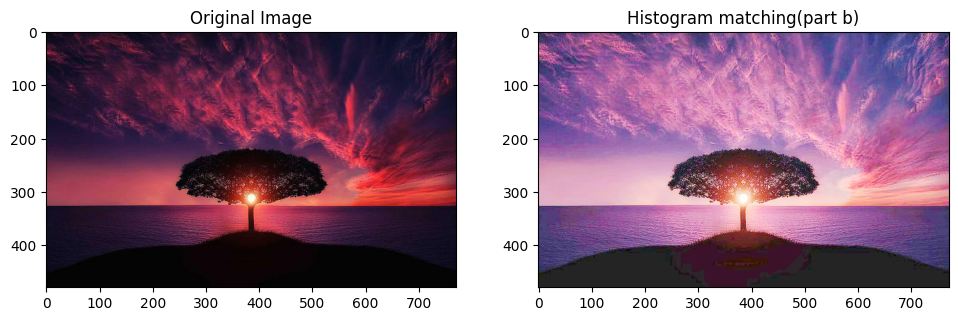

In [10]:
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img[...,::-1]); plt.title('Original Image')
# plt.subplot(132); plt.imshow(matched_img[...,::-1]); plt.title('Histogram matching(part a)')
plt.subplot(132); plt.imshow(img4[...,::-1]); plt.title('Histogram matching(part b)')